<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Biston_betularia_couple.JPG/320px-Biston_betularia_couple.JPG"/>

<center><H1>Algorithme biomimétique pour dupliquer un motif</H1></center>

<h2 style="text-align: center;"><strong><em> Bio-inspir&eacute; par le cas du phal&egrave;ne du bouleau</em></strong></h2>

# Introduction

Dans cet exemple nous allons montrer que les principes de la génétique et de la sélection naturelle sont utilisables pour programmer une recherche de solution rapide à l’encodage d’un motif.

Cet exemple d’algorithme génétique est bio-inspiré d’un exemple célèbre : le mélanisme industriel de la phalène du bouleau. La phalène est une espèce de papillons de nuit qui mime, pour échapper à la prédation des oiseaux, l’écorce claire du bouleau où elle se repose le jour. Avec l’industrialisation et le noircissement de l’écorce du bouleau, l’espèce s’est adaptée à son milieu. Ainsi en quelques années les formes sombres (résultat d’une mutation apparue autour de 1850 dans la région de Manchester) sont devenues majoritaires par rapport aux formes claires.

<center>
<H3>Illustration de l’avantage que procure la couleur contre la prédation.</H3>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Peppered_moths.jpg/430px-Peppered_moths.jpg"/>
Source : https://commons.wikimedia.org/wiki/File:Peppered_moths.jpg
</center>


# Mises en place de algorithme

Les algorithmes génétiques utilisent la notion de sélection naturelle et l'appliquent à une population de solutions potentielles au problème donné.

Dans l'exemple de démonstration de début d'algorithme, le probleme est de trouver le motif codé : TATA.

La première étape va consister à créer une <b>population</b> d'<b>individus</b> dont l'information génétique est composées d'une suite de 4 <b>gènes</b>.  
Dans notre cas les gènes peuvent prendre 4 formes qui sont les 4 bases azotées de l'ADN (A, T, G, C).  

Individu 0 fait de 4 gènes ['A', 'A', 'T', 'G']  
Individu 1 fait de 4 gènes ['C', 'C', 'A', 'T']  
Individu 2 fait de 4 gènes ['A', 'G', 'C', 'C']  
Individu 3 fait de 4 gènes ['A', 'C', 'G', 'C']  
Individu 4 fait de 4 gènes ['G', 'G', 'G', 'G']  

La seconde étape va être de calculer l'aptitude ou **fitness** de chaque individu.
Dans notre cas 1 point est donné à chaque lettre correctement placée.
Nous classons ensuite les individus par ordre décroissant d'aptitude.

individu ['A', **'A'**, **'T'**, 'G'] score : 2  
individu ['G', 'G', 'G', 'G']          score : 0  
individu ['C', 'C', 'A', 'T']          score : 0  
individu ['A', 'G', 'C', 'C']          score : 0  
individu ['A', 'C', 'G', 'C']          score : 0  

Vient la phase de <b>selection</b> d'individus parmis la population.  
Cette selection est composée d'élites et d'autres individus permettant d'assurer la diversité génétique.  
Une fois la selection réalisée on procède aux <b>croisements</b> d'individus donnant alors naissance à des <b>enfants</b> afin de créer une nouvelle population

Vient enfin la <b>mutation</b> génétique s'appliquant à certains enfants pour respecter le principe d'évolution.

Ces phases étant réalisées plusieurs fois jusqu'à obtenir un résultat satisfaisant.

L'ensemble de ces étapes sont détaillées dans le code qui suit. A noter que nous utilisons nos propres méthode de selection et de croisement afin de rendre l'explication plus simple. 

Attention, les algorithmes génétiques <b>ne sont pas des algorithmes d'apprentissage !</b> mais peuvent être utilisés dans le cas de l'intelligence artificielle notemment pour selectionner les neurones les plus performants dans le cadre du deep learning

Avec l'aimable autorisation de Aurélien Vannieuwenhuyze https://github.com/avannieuwenhuyze

# Résolution du problème

Nous définissons l'alphabet dans lequel sera écrite l'information génétique qui compose les individus et qui sera nécessaire à la résolution de notre problème. Nous choissisons comme dans le monde vivant, d'écrire l'information génétique avec les 4 bases azotées de l'ADN.  
Attention dans notre modèle nous avons simplifié et les 4 bases correspondent à des gènes. Dans la nature, les gènes sont une suite de bases.

- la cytosine (C)
- la thymine (T)
- l'adénine (A)
- la guanine (G)

In [39]:
# Pour les AG nous appelerons cela des GENES, 4 GENES sont possibles : A, T, G, C.
GENES = "ATGC"

# Exemple d'information génétique d'un individu composée à partir des 4 GENES.
# La longueur de l'information génétique peut changer selon le problème à résoudre.
InfoTest = "TATA"


### Fonctions utiles

Viennent ensuite les fonctions utiles à savoir :  
- Tirage aléatoire d'un gène parmis un nombre fini de gènes ici 4 (A, T, G, C)
- Génération de l'information génétique d'un individu (composé de gènes choisi aléatoirement)
- Génération de la population (composée d'individus)
- Calcul de l'aptitude d'un individu
- Classement des individus en fonction de leur aptitude
- Manipulation génétique (croisements, mutations...) qui permettra d'engendrer de nouveaux individus et de résoudre notre problème

In [40]:
# Les imports, les librairies necessaires
import random
import numpy as np
from PIL import Image
from numpy import asarray
import ast

In [41]:
# Generation d'un gêne de façon aléatoire
# Le gène est choisi parmis la liste de 4 gènes définis précédemment
def generationGene():
    return random.choice(GENES)

In [42]:
generationGene()

'T'

In [43]:
# Generation de l'information génétique d'un individu (composé de gènes).
# Le nombre de gènes à générer est fonction de la taille de l'information génétique ici taille d'infoTest.
def generationIndividu(infoGENES):
    return [generationGene() for i in range(len(infoGENES))]

In [44]:
generationIndividu(InfoTest)

['A', 'A', 'G', 'T']

In [45]:
# Generation de la population (Composée d'individus)
# Le nombre d'individus à générer est passé en paramètre (5 pour cet exemple)
def generationPopulation(nombreIndividus,infoGENES):
    return [generationIndividu(infoGENES) for i in range(nombreIndividus)]

In [46]:
population = generationPopulation(5,InfoTest)

#On affiche la population pour simple vérification
for i in range(len(population)):
    print("Individu",i,"fait de 4 gènes",population[i])

Individu 0 fait de 4 gènes ['G', 'G', 'A', 'T']
Individu 1 fait de 4 gènes ['G', 'C', 'C', 'T']
Individu 2 fait de 4 gènes ['A', 'G', 'T', 'G']
Individu 3 fait de 4 gènes ['G', 'C', 'T', 'C']
Individu 4 fait de 4 gènes ['A', 'A', 'T', 'A']


In [47]:
#Calcul de l'aptitude d'un individu
#On ajoute 1 point d'aptitude par lettre présente et bien placée dans l'ensemble des gènes de l'individu 
#par rapport au code de référence InfoTest = "TATA"
def calculAptitude(individu,infoGENES):
    aptitude = 0
    for i in range(len(individu)):
        if individu[i] == infoGENES[i]:
            aptitude = aptitude + 1
    return aptitude

In [48]:
#Calcul de l'aptitude du premier individu
#Combien de lettres sont elles bien placées ?
print(population[0])
calculAptitude(population[0],InfoTest)

['G', 'G', 'A', 'T']


0

In [49]:
#Classement des individus de la population par ordre décroissant d'aptitude
#Ce classement inverse est réalisé à l'aide d'une fonction lambda
#Le résultat est un tableau dont la première colonne contient son aptitude et la seconde l'individu.
def classementIndividus(population,infoGENES):
    classement_individus = []
    for individu in population:
        classement_individus.append((calculAptitude(individu,infoGENES),individu))
    classement_individus.sort(reverse=True)
    return classement_individus

In [50]:
classement = classementIndividus(population,InfoTest)
for individu in classement:
    print(f"individu {individu[1]} score : {individu[0]}")

individu ['A', 'A', 'T', 'A'] score : 3
individu ['G', 'C', 'T', 'C'] score : 1
individu ['A', 'G', 'T', 'G'] score : 1
individu ['G', 'G', 'A', 'T'] score : 0
individu ['G', 'C', 'C', 'T'] score : 0


# Manipulations génétiques

Nous voici présent à la fonction qui va permettre de :
- Selectionner les individus (ceux ayant une meilleure aptitude)
- Croiser les individus de forte aptitude permettant de créer des enfants
- Muter génétiquement les enfants comme cela se produit dans la nature

In [51]:
def generationFuture(population,pourcentageElitisme,tauxMutation,infoGENES):
    
    #1: On classe les individus de la population passée en paramètre
    classement_individus = classementIndividus(population,infoGENES)

    
    #2: On crée 2 tableaux. L'un contenant l'individu gagnant, l'autre un tableau contenant les individus classés mais 
    #sans leur valeur d'aptitude
    individu_gagnant = []
    individus_classes = []
    
    #3: Parcours des individus
    for aptitude, individu in classement_individus:
    
        #On stock l'individu sans son aptitude dans un nouveau tableau
        individus_classes.append(individu)
    
        #Si l'aptitude est égale à la longueur du mot secret à trouver, cela signifie que nous avons trouvé la solution.
        if aptitude==len(infoGENES):
            individu_gagnant.append(individu)
      
        if individu_gagnant:
            return population,individu_gagnant
    
    #4: Selection des meilleurs individus (elites) devenant alors parents
    #Leur nombre est fonction du pourcentage d'élites passé en paramètre
    nombreElites = int(len(population)*pourcentageElitisme)
    parents = individus_classes[:nombreElites] 

    #5: On selectionne d'autres parents pour maintenir la diversité génétique
    #Cette selection se fait au hasard
    #Si la roulette sort une valeur inférieure à 0.05 alors on ajoute l'individus aux parents
    for individu in individus_classes[nombreElites:]:
        roulette = random.random()
        if roulette < 0.05:
            parents.append(individu)
    
   
    #6: Croisement des parents pour créer une nouvelle génération
    nombreDeParentsSelectionnes = len(parents)
    nombreEnfantsSouhaites = len(population)-nombreDeParentsSelectionnes
    
    
    #Le nombre de gènes du père sera égal à la longueur du code secret divisé par deux
    nombreGenesPere = len(infoGENES)//2
    
    #Le nombre de gènes de la mère sera égal à la longueur du mot - le nombre de gène du père
    nombreGenesMere = len(infoGENES)-nombreGenesPere
    

    #Tant que nous n'avons pas le nombre d'enfants souhaité,
    #On choisi 2 parents au hasard
    #On extrait les gènes du père en fonction du nombre déterminé précédemment
    #On extrait les gènes de la mère en fonction du nombre déterminé précédemment
    #On concatène les deux pour obtenir un enfant
    enfants = []
    while len(enfants) < nombreEnfantsSouhaites:
        pere = random.choice(parents)
        mere = random.choice(parents)
        enfant = pere[:nombreGenesPere] + mere[nombreGenesMere:]
        enfants.append(enfant)
        
    #Mutation génétique de certain enfants
    #Cette mutation se fait aussi au hasard
    #- Tant sur le choix de l'individu 
    #- Tant sur le gene à modifier
    for enfant in enfants :
        if random.random() < tauxMutation:
            indexGene = int(random.random()*(len(infoGENES)))
            enfant[indexGene] = generationGene()
        
    #Ajout des enfants à la liste des parents pour créer la population
    parents.extend(enfants)
    
    return parents,individu_gagnant
    

# Recherche de la solution

Création de la fonction permettant d'afficher un code génétique sous la forme d'une image.

Un exemple de motif


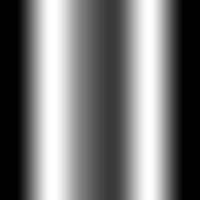

In [52]:
from math import sqrt
def gene_en_image(CODE):
    "Transforme un CODE en une image. Le CODE est de la taille du carré d'un entier"
    # Taille du code
    taille = int(sqrt(len(CODE)))
    # Transformation du CODE pour créer un tableau de l'image de format taille x taille
    Liste = []
    for i in range(taille):
        Liste.append([])
        for j in range(taille):
            if CODE[taille * i + j] == "A":
                Liste[i].append(0)
            if CODE[taille * i + j] == "T":
                Liste[i].append(64)
            if CODE[taille * i + j] == "G":
                Liste[i].append(120)
            if CODE[taille * i + j] == "C":
                Liste[i].append(255)
    
    # Création de l'image comme une matrice (array) avant de la tracer
    data = np.array(Liste)
    image = Image.fromarray(data)
    # Zoom sur l'image
    image = image.resize((200, 200))
    image.show()
    image.close()
    
# Un exemple :
CODE = "ACGTCAACGTCAACGTCAACGTCAACGTCAACGTCA"
print("Un exemple de motif")
gene_en_image(CODE)

In [53]:
reponse_1 = int(input("Souhaitez vous travailler avec l'exemple proposé ? 0 = non, 1 = oui "))
if reponse_1 == 1:
    CODE = "ACGTCAACGTCAACGTCAACGTCAACGTCAACGTCA"
else:
    reponse = int(input("La séquence du code génétique est le carré PAIR d'un entier \n"+
                "Souhaitez-vous rentrez ce code à la main ? 0 : non, 1 : oui "))
    if reponse == 1:
        CODE = input("Donnez votre code : ")
    else : 
        taille_code = int(input("Quel est la taille de la séquence de votre code génétique ? \n"+
                                "c'est le carré d'un entier : 4, 16, 36, 64, 100, 144, 256, ... : "))
        CODE = ""
        for i in range(taille_code):
            CODE = CODE + generationGene()
print(CODE)

Souhaitez vous travailler avec l'exemple proposé ? 0 = non, 1 = oui 1
ACGTCAACGTCAACGTCAACGTCAACGTCAACGTCA


Pas de solution trouvée...
Meilleur résultat en 30 générations (score max = 36)
Image du classement Max


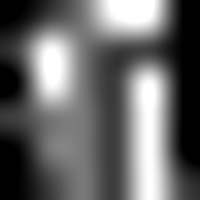

Image du classement Min


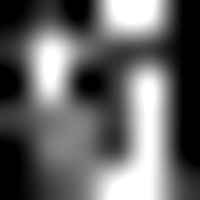

Code classement Max :  ATGCCATCGTTAACGTCATGGTCAAGGTCAATGTCT
Code classement Min :  ATACCATCGTTAACATCATGGTCAAGGTCAATGCCT
Code de référence   :  ACGTCAACGTCAACGTCAACGTCAACGTCAACGTCA
Image de référence


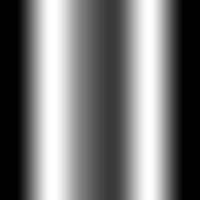

In [56]:
NOMBRE_INDIVIDUS = 100 #100
POURCENTAGE_ELITE = 0.20 #0.20
TAUX_MUTATION =0.1 #0.1

#On définit un maximum de générations pour éviter une boucle infinie dans le cas où aucune solution n'est trouvée
MAXIMUM_GENERATIONS = 30

#Generation d'une population initiale
population = generationPopulation(NOMBRE_INDIVIDUS,CODE)

#Execution de l'algorithme génétique
i=0
individu_gagnant = None

while not individu_gagnant and i<MAXIMUM_GENERATIONS:
    population, individu_gagnant = generationFuture(population,POURCENTAGE_ELITE,TAUX_MUTATION,CODE)
    i = i+1
    if i == 100:
        print('Classement G1')
        print(classement[0])
        # On reforme le "code" de cet individu
        CODE_individu = ""
        for gene in classement[0]:
            CODE_individu = CODE_individu + gene
        print("Code de référence : ", CODE)
        print("Code individu     : ", CODE_individu)
        # On imprime son image
        gene_en_image(CODE_individu)

if individu_gagnant:
    print("Solution trouvée :"+str(individu_gagnant)+" Nb générations = "+str(i))
    # On reforme le "code" de cet individu
    CODE_individu_gagnant = ""
    for gene in individu_gagnant[0]:
        CODE_individu_gagnant = CODE_individu_gagnant + gene
    print("Code de référence     : ", CODE)
    print("Code individu gagnant : ", CODE_individu_gagnant)
    # On imprime son image
    gene_en_image(CODE_individu_gagnant)

       
else:
    print("Pas de solution trouvée...")
    print(f'Meilleur résultat en {MAXIMUM_GENERATIONS} générations (score max = 36)')
    classement = classementIndividus(population,CODE)
    CODE_classement_max = ""
    for gene in classement[0][1]:
        CODE_classement_max = CODE_classement_max + gene
    CODE_classement_min = ""
    for gene in classement[99][1]:
        CODE_classement_min = CODE_classement_min + gene
    print("Image du classement Max")
    gene_en_image(CODE_classement_max)
    print("Image du classement Min")
    gene_en_image(CODE_classement_min)
    print("Code classement Max : ", CODE_classement_max)
    print("Code classement Min : ", CODE_classement_min)
    print("Code de référence   : ", CODE)
    
print('Image de référence')
gene_en_image(CODE)


Par ce petit exemple, nous venons de découvrir le principe de fonctionnement des algorithmes génétiques. Bien entendu la forme présentée de l'algorithme est assez simple. Il existe en effet de nombreuses fonctions de selections et de croisements d'individus pour lesquelles nous aurons l'occasion de revenir en détail dans un exemple plus complet trés prochainement.  
